In [1]:
# Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent PRACTICE_2

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
import random
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("homeprices_banglore.csv")
df.head(20)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [5]:
X = df.drop('price', axis='columns')
y = df.price

In [6]:
X.head(3)

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3


In [7]:
y.head(3)

0     39.07
1    120.00
2     62.00
Name: price, dtype: float64

In [8]:
sx = MinMaxScaler()
sy = MinMaxScaler()

In [9]:
X_scaled = sx.fit_transform(X)
X_scaled[:3]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ]])

In [10]:
y_sacled = sy.fit_transform(y.values.reshape(-1, 1))
y_sacled[:3]

array([[0.05237037],
       [0.65185185],
       [0.22222222]])

# STOCHASTIC GRADIENT DESCENT

In [11]:
def gradientDescentSGD(X_, y_true):
    W = np.ones(X.shape[1])
    bias = 0
    n = len(X_)
    learning_rate = 0.01
    
    SGDcost_ = []
    SGDepochs_ = []
    
    for i in range(500):
        y_pred = X_.dot(W) + bias
        
        dw = -(2/n)*(X_.T.dot(y_true-y_pred))
        db = -(2/n)*np.mean(y_true-y_pred)
        
        W = W - learning_rate*dw
        bias = bias - learning_rate*db
        
        cost = np.mean(np.square(y_pred-y_true))
        
        if i%10 == 0:
            SGDcost_.append(cost)
            SGDepochs_.append(i)
#             print(f'EPOCHS: {i}, COST: {cost}, W: {W}, BIAS: {bias}')
            
    return W, bias, SGDcost_, SGDepochs_

W, bias, SGDcost_, SGDepochs_ = gradientDescentSGD(X_scaled, y_sacled.reshape(y_sacled.shape[0]))

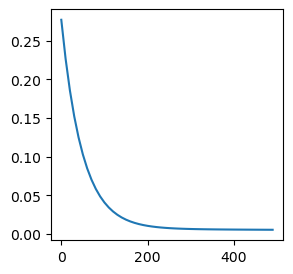

In [12]:
plt.figure(figsize=(3, 3))
plt.plot(SGDepochs_, SGDcost_)

In [18]:
def SGDprediction(W, bias, area, rooms):
    features = sx.transform([[area, rooms]])[0]
    price = W[0]*features[0] + W[1]*features[1] + bias
    return sy.inverse_transform([[price]])
    
SGDprediction(W, bias, 1000, 2)[0][0]

45.05767135310865

# BATCH GRADIENT DESCENT

In [14]:
def gradientDescentBGD(X_, y_true):
    W = np.ones(X.shape[1])
    bias = 0
    n = len(X_)
    learning_rate = 0.01
    
    BGDcost_ = []
    BGDepochs_ = []
    
    for i in range(3000):
        XR = X_[random.randint(0, n-1)]
        YR = y_true[random.randint(0, n-1)]
        
        y_pred = XR.dot(W) + bias
        
        dw = -(2/n)*(XR.T.dot(YR-y_pred))
        db = -(2/n)*np.mean(YR-y_pred)
        
        W = W - learning_rate*dw
        bias = bias - learning_rate*db
        
        cost = np.mean(np.square(y_pred-YR))
        
        if i%10 == 0:
            BGDcost_.append(cost)
            BGDepochs_.append(i)
#             print(f'EPOCHS: {i}, COST: {cost}, W: {W}, BIAS: {bias}')
            
    return W, bias, BGDcost_, BGDepochs_

BW, Bbias, BGDcost_, BGDepochs_ = gradientDescentBGD(X_scaled, y_sacled.reshape(y_sacled.shape[0]))

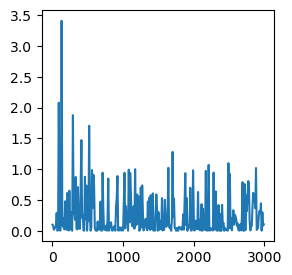

In [15]:
plt.figure(figsize=(3, 3))
plt.plot(BGDepochs_, BGDcost_)

In [19]:
def BGDprediction(W, bias, area, rooms):
    features = sx.transform([[area, rooms]])[0]
    price = W[0]*features[0] + W[1]*features[1] + bias
    return sy.inverse_transform([[price]])
    
BGDprediction(BW, Bbias, 1000, 2)[0][0]

31.641373593384394